### Static analysis

Verify whether this structure is unstable:

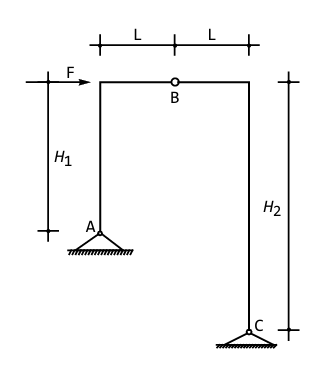

We'll consider constraint forces:

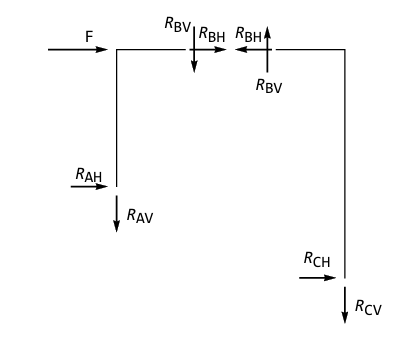

In [1]:
# Importing SymPy
import sympy as smp

In [2]:
# Variables
F, R_BV, R_BH, R_AH, R_AV, R_CH, R_CV = smp.symbols("F \\R_{BV} \\R_{BH} \\R_{AH} \\R_{AV} \\R_{CH} \\R_{CV}", real = True)

# x and y unit vectors
x = smp.Matrix([1, 0, 0])
y = smp.Matrix([0, 1, 0])

# Forces
Fv = F * x
R_AHv = R_AH * x
R_AVv = - R_AV * y
R_CHv = R_CH * x
R_CVv = - R_CV * y
R_BV_leftv = - R_BV * y
R_BV_rightv = - R_BV_leftv
R_BH_leftv = R_BH * x
R_BH_rightv = - R_BH_leftv

# Constants
H1, H2, L = smp.symbols("H_1 H_2 L", real = True, positive = True, constant = True)

# Application points
F_point = smp.Matrix([0, H1, 0])
B = smp.Matrix([L, H1, 0])
C = smp.Matrix([2 * L, - (H2 - H1), 0])

In [3]:
# Equations for the left beam
m1 = Fv + R_BH_leftv + R_AHv # Sum of the along forces x = 0
m2 = R_AVv + R_BV_leftv # Sum of the forces along y = 0
m3 = F_point.cross(Fv) + B.cross(R_BH_leftv) + B.cross(R_BV_leftv) # Sum of the moments = 0

# Equations for the right beam
m4 = R_CHv + R_BH_rightv # Sum of the along forces x = 0
m5 = R_CVv + R_BV_rightv # Sum of the forces along y = 0
m6 = C.cross(R_CHv) + C.cross(R_CVv) + B.cross(R_BH_rightv) + B.cross(R_BV_rightv) # Sum of the moments = 0

In [4]:
m1

Matrix([
[F + \R_{AH} + \R_{BH}],
[                    0],
[                    0]])

In [5]:
m2

Matrix([
[                 0],
[-\R_{AV} - \R_{BV}],
[                 0]])

In [6]:
m3

Matrix([
[                               0],
[                               0],
[-F*H_1 - H_1*\R_{BH} - L*\R_{BV}]])

In [7]:
m4

Matrix([
[-\R_{BH} + \R_{CH}],
[                 0],
[                 0]])

In [8]:
m5

Matrix([
[                0],
[\R_{BV} - \R_{CV}],
[                0]])

In [9]:
m6

Matrix([
[                                                          0],
[                                                          0],
[H_1*\R_{BH} + L*\R_{BV} - 2*L*\R_{CV} - \R_{CH}*(H_1 - H_2)]])

In [10]:
# Finding the unknown forces
equations = smp.Matrix.vstack(m1, m2, m3, m4, m5, m6)
variables = [R_BV, R_BH, R_AH, R_AV, R_CH, R_CV]

sol = smp.solve(equations, variables)
sol

{\R_{AH}: -F*H_2/(H_1 + H_2),
 \R_{AV}: F*H_1*H_2/(H_1*L + H_2*L),
 \R_{BH}: -F*H_1/(H_1 + H_2),
 \R_{BV}: -F*H_1*H_2/(H_1*L + H_2*L),
 \R_{CH}: -F*H_1/(H_1 + H_2),
 \R_{CV}: -F*H_1*H_2/(H_1*L + H_2*L)}

In [11]:
sol[R_AH]

-F*H_2/(H_1 + H_2)

In [12]:
sol[R_AV]

F*H_1*H_2/(H_1*L + H_2*L)

In [13]:
sol[R_BH]

-F*H_1/(H_1 + H_2)

In [14]:
sol[R_BV]

-F*H_1*H_2/(H_1*L + H_2*L)

In [15]:
sol[R_CH]

-F*H_1/(H_1 + H_2)

In [16]:
sol[R_CV]

-F*H_1*H_2/(H_1*L + H_2*L)